In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.colors as colors
import pandas as pd
from pandas.core.common import flatten
import scipy
import time
from ripser import ripser
import tadasets
from persim import plot_diagrams
# from ggplot import *


Bad key "text.kerning_factor" on line 4 in
/home/harryem/anaconda3/envs/bats_p37/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


# ripser_individuals

This notebook looks at the points furthest from the diagonal in the rips complex, takes the individuals which make them up, collects them by cluster, and compares the PC diagrams labelled by either in / not in cluster.

In [2]:
gt_matrix_PCs = np.load('/home/harryem/data/HimalGen/gt_matrix_PCs.npy').T.astype(float)
labels_pop = pd.read_csv('~/../projects/HimalGenAsia/HimalGen.popinfo.csv',sep=',')

## Manhattan distance matrix

In [3]:
D_Full_Man = np.load('/home/harryem/data/HimalGen/D_Full_Man.npy')
D_Full_Man = scipy.spatial.distance.squareform(D_Full_Man)

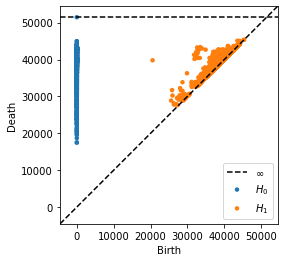

Time: 113.6 seconds


In [4]:
start = time.time()
result_manhattan = ripser(D_Full_Man, coeff=2, maxdim=1, do_cocycles=True, distance_matrix=True)
diagrams = result_manhattan['dgms']
plot_diagrams(diagrams, show=True)

print("Time: {:.1f} seconds".format(time.time() - start))

# GT matrix PCs

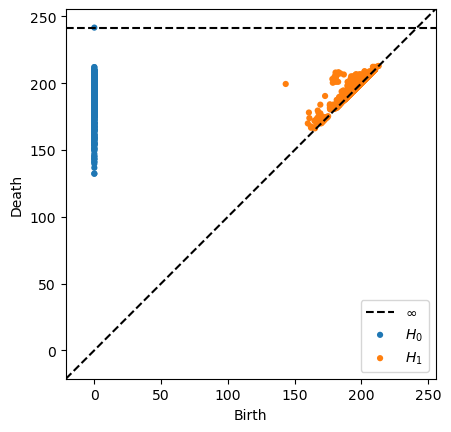

Time: 0.5 seconds


In [11]:
# PCA
start = time.time()
result_gt_pcs = ripser(gt_matrix_PCs, coeff=2, maxdim=1, do_cocycles=True)
diagrams = result_gt_pcs['dgms']
plot_diagrams(diagrams, show=True)

print("Time: {:.1f} seconds".format(time.time() - start))

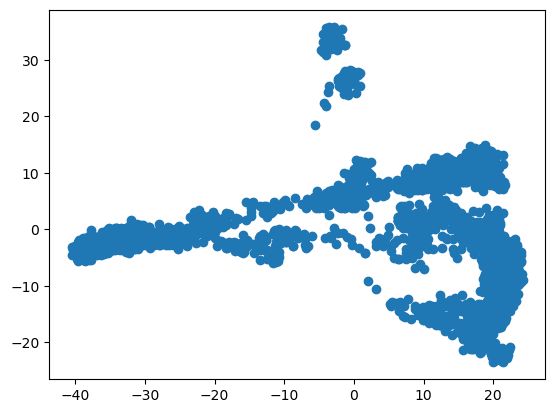

In [5]:
# gt_matrix_PCs = np.load('/home/harryem/data/HimalGen/gt_matrix_PCs.npy').T.astype(float)

plt.scatter(gt_matrix_PCs[:,0], gt_matrix_PCs[:,1])
plt.show()

In [6]:
dgm1 = diagrams[1]
ordered_cocycles = np.argsort(dgm1[:, 1] - dgm1[:, 0])[::-1]
# idx = np.argmax(dgm1[:, 1] - dgm1[:, 0])
cocycle_number = 0
idx=ordered_cocycles[cocycle_number]
cocycles = result['cocycles']
D = result['dperm2all']
cocycle = cocycles[1][idx]

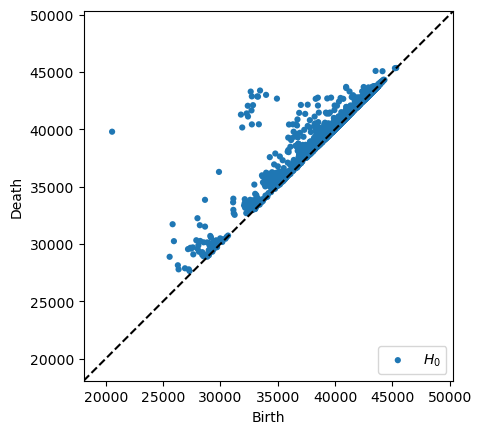

In [7]:
plot_diagrams(diagrams[1], show=True)

In [ ]:
1

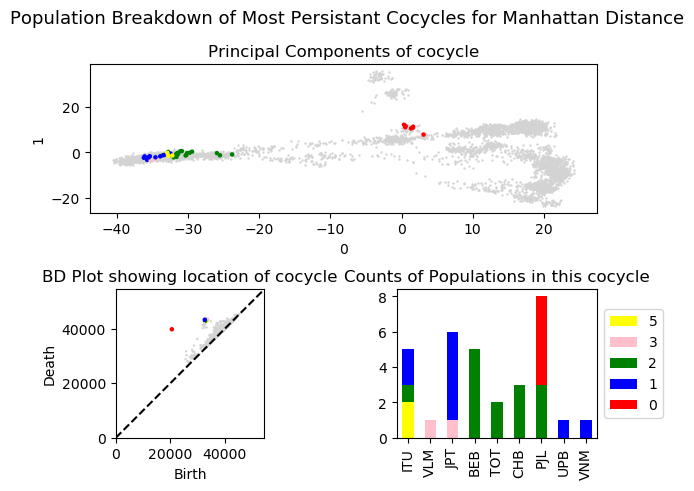

In [7]:
from ripserIndividualPlots import display_cocycle_charts

# cocycle_number_list = [3]
cocycle_number_list = [0,1,2,3,5]
popinfo_path = '~/../projects/HimalGenAsia/HimalGen.popinfo.csv'
colordict = {
    -1: 'lightgrey',
    0: 'red',
    1: 'blue',
    2: 'green',
    3: 'pink',
    4: 'black',
    5: 'yellow',
    6: 'lightblue'
}

fig = display_cocycle_charts(cocycle_number_list, gt_matrix_PCs, colordict, result_manhattan)
fig.suptitle('Population Breakdown of Most Persistant Cocycles for Manhattan Distance', fontsize=13)

fig.show()

In [17]:
# save to svg
fig.savefig("Manhattan_Distance_individuals_plots.svg", format="svg")

In [19]:
fig = display_cocycle_charts(cocycle_number_list, gt_matrix_PCs, colordict, result_gt_pcs)
fig.suptitle('Population Breakdown of Most Persistant Cocycles for All Principal Components', fontsize=13)

fig.show()

NameError: name 'result_gt_pcs' is not defined

In [13]:
# save to svg
fig.savefig("gt_matrix_PCs_individuals_plots.svg", format="svg")